In [1]:
import lasio
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from random import randint, uniform, seed
from colorsys import hsv_to_rgb


%matplotlib inline

In [2]:
tops = pd.read_csv(r"teapot_clean_JRP.csv", index_col=[0]) #read in the top data
tops.rename(columns={'TVDSS':'SS'}, inplace=True)
upper_top = tops[tops.API ==490251103200]
lower_top = tops[tops.API == 490250633800]
tops = tops[tops.API == 490252319500]
tops = tops.drop_duplicates(subset='Formation')

In [3]:
shift = (upper_top[upper_top['Formation'] == 'SHNNbs'].MD.values-tops[tops['Formation'] == 'SHNNbs'].MD.values)[0]
upper_top['New_MD'] = upper_top.MD.values - shift
shift2 = (lower_top[lower_top['Formation'] == 'OPCH'].MD.values-tops[tops['Formation'] == 'OPCH'].MD.values)[0]
lower_top['New_MD'] = lower_top.MD.values - shift
tops['New_MD'] = tops.MD.values
upper_top = upper_top[upper_top.New_MD<387]
lower_top = lower_top[lower_top.New_MD>5300]

In [4]:
strat_order = ['SSXS', 'SSXbase','SHNNu', 'SHNNl','SHNNbs','StBR','StFT','StGD','StAM','StTC','NBRRws','NBRRsg','CRLL',
                'F1WC',
'F1WCBench1Base', 'F1WCBench2Top', 'F1WCBench2Base', 'F1WCBench3Top',
'F1WCbase','B1','F2WC','F2WCbase',
'F3WC',
'F3WCbase',
'MWRY',
'MDDY',
'THRM',
'DKOT',
'LKOT', # base cret
'MRSN',
'SNDCu',# upper sundance
'CNSP', # base jurassic canyon spring
'CRMT', # Crow mountain, Chugwater Group/FM
'ALCV', # Alcova ls, chugwater
'RDPK', # base Triassic chugwater
'ERVY', # goose egg member
'FRLL', # goose egg
'GLND', # goose egg
'MNKT', # goose egg
'OPCH', # goose egg Base Permian
'A Sand', # Tensleep 
'B Dolo',
'B Sand',
'C1 Dolo',
'C1 Sand',
'C2 Dolo',
'C2 Sand',
'C3 Dolo',
'C3 Sand',
'C4 Dolo',
'C4 Sand',
'D Dolo',
'D Sand',
'E Dolo',
'AMSD', # base Pennsylvanian
'MDSN', # base mississippian
'PC'
]

colors_to_plot =  pd.read_csv('color_palette.csv').to_dict(orient='list')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker

from welly import Well
from bruges import petrophysics as pet
import lasio

In [6]:
datafile = r'E:\UT Austin\Datasets\rmotc\DataSets\Well Log\CD Files\LAS_log_files\Deeper_LAS_files\490252319500\AIT_TLD_MCFL_CNL_040PUP.las' 
w = Well.from_las(datafile)
datafile2 = r'E:\UT Austin\Datasets\rmotc\DataSets\Well Log\CD Files\LAS_log_files\Deeper_LAS_files\490252319500\AIT_TLD_MCFL_CNL_019PUP.las' 
datafile3 = r'E:\UT Austin\Datasets\rmotc\DataSets\Well Log\CD Files\LAS_log_files\Deeper_LAS_files\490252319500\AIT_TLD_MCFL_CNL_018LUP.las' 
datafile4 = r'E:\UT Austin\Datasets\rmotc\DataSets\Well Log\CD Files\LAS_log_files\Shallow_LAS_files\49025110320000_480805.las'
datafile5 = r'E:\UT Austin\Datasets\rmotc\DataSets\Well Log\CD Files\LAS_log_files\Deeper_LAS_files\49025063380000_292976.las'

In [7]:
las = lasio.read(datafile)
las2 = lasio.read(datafile2)
las3 = lasio.read(datafile3)
las4 = lasio.read(datafile4)
las5 = lasio.read(datafile5)

In [8]:
total = pd.concat([lower_top, upper_top, tops])
#total.sort_values(['API', 'MD']).to_csv('type_log_tops.csv')

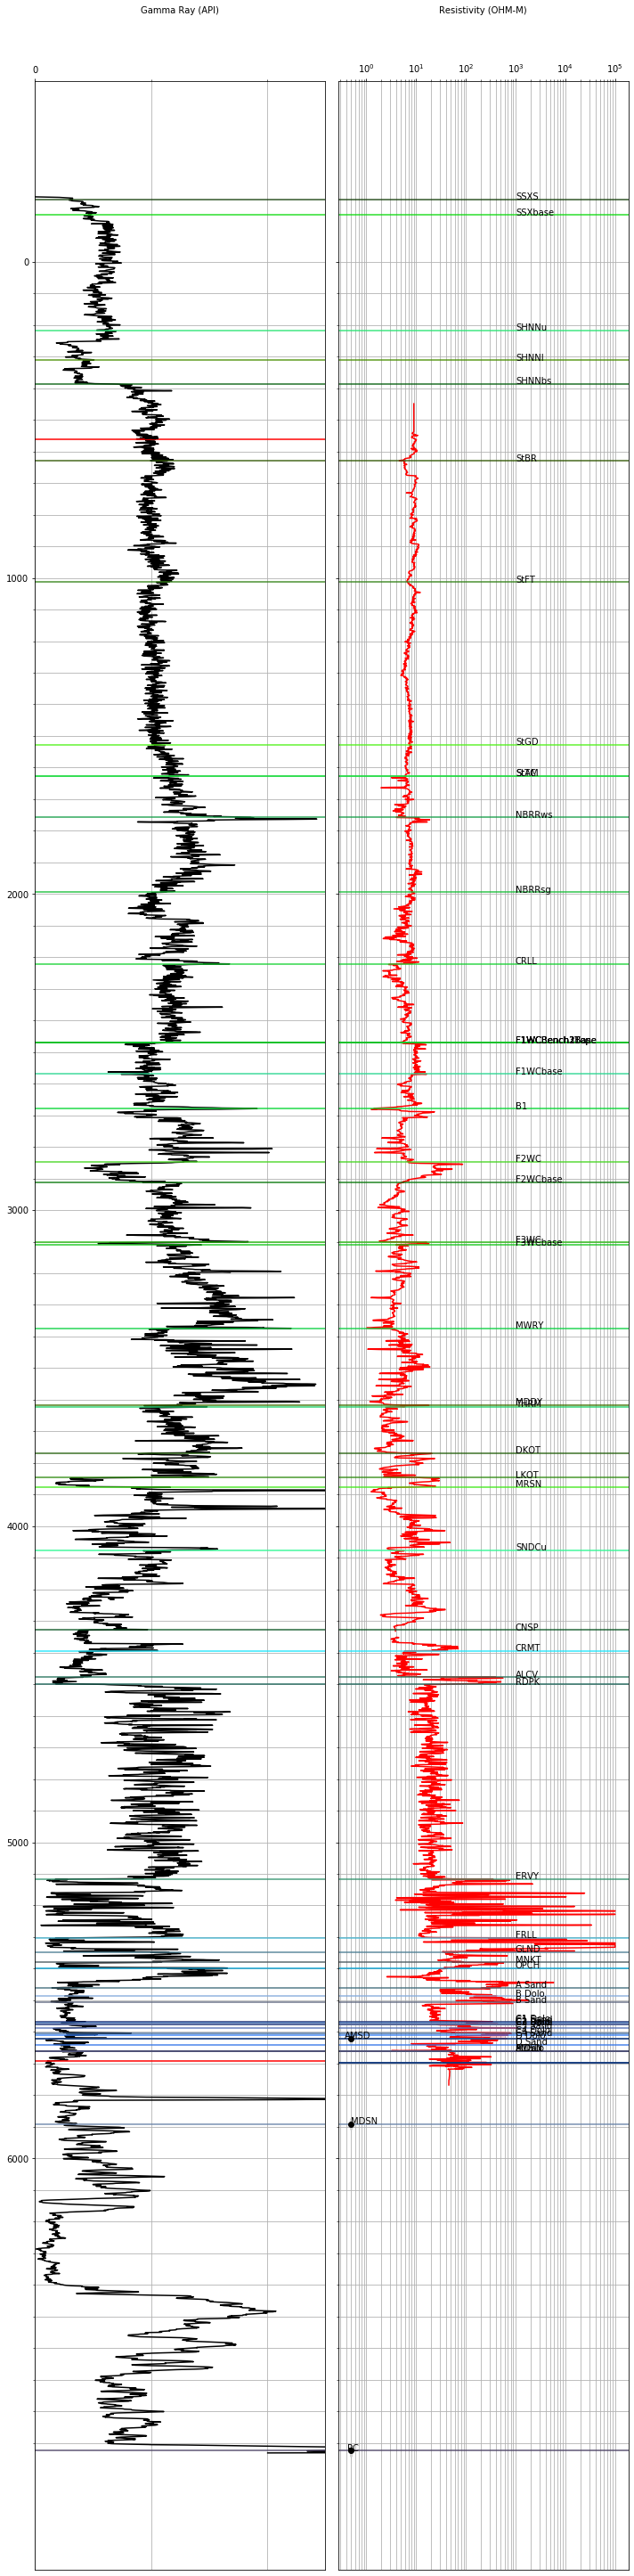

In [22]:
major_ticks = np.arange(0, 7000, 1000)
minor_ticks = np.arange(0, 7000, 100)

fig, [ax1, ax2] = plt.subplots(1, 2, sharey=True, figsize=(10, 40))

ax1.plot(las2["GR"][150:],las2["DEPT"][150:], c='k')
ax1.axhline(las2["DEPT"][150], c='r') #splice point 2

ax1.plot(las3["GR"][100:-100],las3["DEPT"][100:-100], c='k')
ax1.axhline(las4['DEPT'][1550]-215, c='r', ) #splice point
ax1.plot(las4['GRR'][:1550]-25, las4['DEPT'][:1550]-215, c='k') #splice point
ax1.plot(las5['GRN'][4240:], las5['DEPT'][4240:]-shift2, c='k', ) #splice point2

ax1.set_xticks(major_ticks)
ax1.set_xticks(minor_ticks, minor=True)
ax1.set_yticks(major_ticks)
ax1.set_yticks(minor_ticks, minor=True)

ax1.grid(True, which='both')
ax1.xaxis.grid(True, which='minor')
ax1.set_xlim(0,250)
#ax1.set_ylim(0,5500)
ax1.xaxis.tick_top()
ax1.xaxis.set_label_coords(0.5,1.03)
ax1.set_xlabel('Gamma Ray (API)')


#ax1.invert_yaxis()
ax2.plot(las2["RLA5"][0:-250],las2["DEPT"][0:-250], c='red')
ax2.plot(las3["AHT90"],las3["DEPT"], c='red')
#ax2.plot(las4["RILD"],las4["DEPT"]-215, c='red')

#ax2.plot(las4['RILD'], las4['DEPT']-215, c='k') #splice point

ax2.semilogx()
ax2.grid(True, which='both')
ax2.xaxis.tick_top()
ax2.xaxis.set_label_coords(0.5,1.03)
ax2.set_xlabel('Resistivity (OHM-M)')
ax2.invert_yaxis()

#ax3.plot(las2["RLA5"][0:-250],las2["DEPT"][0:-250], c='red')
#ax3.grid(True, which='both')
#ax3.semilogx()
#ax3.invert_yaxis()

#ax3.plot(las["RHOZ"],las["DEPT"], c='red')
#ax3.plot(las2["RHOZ"],las2["DEPT"], c='red')
#ax3.plot(las3["RHOZ"],las3["DEPT"], c='red')
#ax2.semilogx()
#ax2.set_xlim(0,1000000)
# flip the axis so downhole is down in the figure

for top in strat_order:
    
    topped = tops[tops['Formation'] == top]
    utop = upper_top[upper_top['Formation'] == top]
    ltop = lower_top[lower_top['Formation'] == top]
    if utop.shape[0]>0:
        md = utop.New_MD.values[0]

    elif topped.shape[0]>0:
        md = topped.MD.values[0]
   
    ax2.axhline(y=md, color=colors_to_plot[top], linestyle="-", alpha=0.9)
    ax1.axhline(y=md, color=colors_to_plot[top], linestyle="-", alpha=0.9)
    #ax3.axhline(y=md, color=colors_to_plot[top], linestyle="-", alpha=0.5)
    ax2.annotate(top, (1000,md))    #ax.axhline(y=tops.iloc[i].MD, color="green", linestyle="-", alpha=0.1)

for top in strat_order:
    try:
        depth = lower_top[lower_top.Formation == top].MD.values[0]-shift2
        #ax3.axhline(y=depth, color=colors_to_plot[top], linestyle="-", alpha=0.5)
        ax1.axhline(y=depth, color=colors_to_plot[top], linestyle="-", alpha=0.9)
        ax2.errorbar(0.5, depth, yerr=18.11, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0); 
        ax2.axhline(y=depth, color=colors_to_plot[top], linestyle="-", alpha=0.9)

        ax2.annotate(top, (np.random.rand(1),depth))
    except:
        pass
#ax3.axhline(las5['DEPT'][4240]-shift2, c=colors_to_plot['AMSD'] ) #splice point2

ax2.axhline(las5['DEPT'][4240]-shift2, c=colors_to_plot['AMSD'] ) #splice point2
ax2.axhline(las5['DEPT'][4240]-shift2, c=colors_to_plot['AMSD'] ) #splice point2

plt.tight_layout()
plt.savefig('composite_section.pdf')

C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


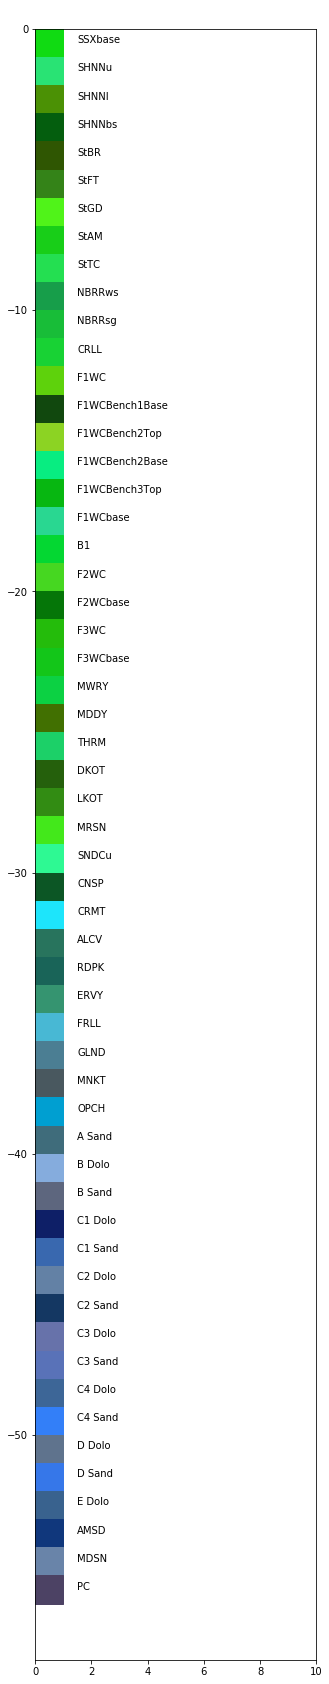

In [10]:
import matplotlib.patches as patches
fig1 = plt.figure(figsize=(20,30))
for i in enumerate(strat_order):
    width = 1
    height = 1
    lims = (0, 10)
    
    ax1 = fig1.add_subplot(111, aspect='equal')
    ax1.add_patch(
        patches.Rectangle((0, i[0]*-1), width, height, color=colors_to_plot[i[1]]))
    ax1.annotate(i[1], (1.5, -1*i[0]+0.5))
    plt.ylim(-58,0)
    plt.xlim(lims)
    

(5600, 5800)

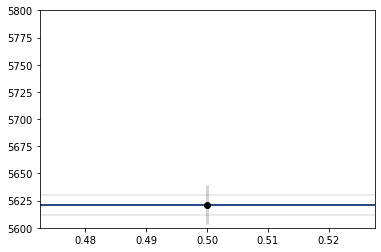

In [20]:
for top in strat_order:
    try:
        depth = lower_top[lower_top.Formation == top].MD.values[0]-shift2
        #ax3.axhline(y=depth, color=colors_to_plot[top], linestyle="-", alpha=0.5)
        plt.axhline(y=depth, color=colors_to_plot[top], linestyle="-", alpha=0.9)
        plt.axhline(y=depth+18.11/2, color='black', linestyle="-", alpha=0.1)
        plt.axhline(y=depth-18.11/2, color='black', linestyle="-", alpha=0.1)
        plt.axhline(y=depth, color=colors_to_plot[top], linestyle="-", alpha=0.9)
        plt.errorbar(0.5, depth, yerr=18.11, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);        p
        lt.annotate(top, (np.random.rand(1),depth))
    except:
        pass
plt.ylim(5600,5800)

In [12]:
lower_top

,API,Formation,MD,GL,DELEV,DT,SS,New_MD
5580,490250633800,PC,6848.08,5184.0,5195.0,KB,-1675.08,6611.89
5581,490250633800,MDSN,5814.75,5184.0,5195.0,KB,-641.75,5578.56
5582,490250633800,AMSD,5544.23,5184.0,5195.0,KB,-371.23,5308.04


In [13]:
tops.sort_values('MD')

,API,Formation,MD,GL,DELEV,DT,SS,New_MD
3293,490252319500,SHNNu,224.74,5105.0,5114.6,KB,4870.66,224.74
3292,490252319500,SHNNl,311.84,5105.0,5114.6,KB,4783.56,311.84
3294,490252319500,SHNNbs,386.04,5105.0,5114.6,KB,4709.36,386.04
3264,490252319500,StBR,630.00,5105.0,5114.6,KB,4465.40,630.00
3265,490252319500,StFT,1013.00,5105.0,5114.6,KB,4082.40,1013.00
3266,490252319500,StGD,1527.00,5105.0,5114.6,KB,3568.40,1527.00
3267,490252319500,StAM,1626.00,5105.0,5114.6,KB,3469.40,1626.00
3268,490252319500,NBRRws,1758.00,5105.0,5114.6,KB,3337.40,1758.00
3269,490252319500,NBRRsg,1994.00,5105.0,5114.6,KB,3101.40,1994.00
3270,490252319500,CRLL,2222.00,5105.0,5114.6,KB,2873.40,2222.00
